### Step 1: Loading and Previewing the Data



In [11]:
import pandas as pd
import numpy as np

# Loading the datasets
gross_df = pd.read_csv('bom.movie_gross.csv')
basics_df = pd.read_csv('title.basics.csv')
ratings_df = pd.read_csv('title.ratings.csv')

# Previewing the data

#print("Gross Data:")
#print(gross_df.head())
print(f"Gross Data:", gross_df.head())

#print("\nBasics Data:")
#print(basics_df.head())
print(f"\nBasics Data:", basics_df.head())

#print("\nRatings Data:")
#print(ratings_df.head())
print(f"\nRatings Data:", ratings_df.head())

Gross Data:                                          title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  

Basics Data:       tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0

### Step 2: Merging the Datasets

In [12]:
# Merging basics and ratings on 'tconst'
merged_df = pd.merge(basics_df, ratings_df, on='tconst')

# Merging with gross data on 'primary_title' and 'title'
final_df = pd.merge(merged_df, gross_df, left_on='primary_title', right_on='title')

# Dropping duplicates and previewing
final_df.drop_duplicates(inplace=True)
final_df.head()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016.0,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012.0,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000,2012
2,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
3,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014
4,tt0369610,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,652300000.0,"1,019.4",2015


### Step 4: Exploratory Data Analysis (EDA)

## 1. 📈 Distribution of Average Ratings

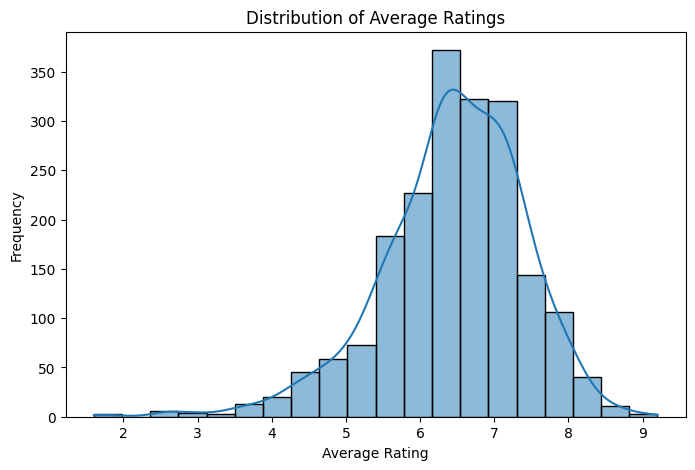

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of average ratings to understand how movies are rated
plt.figure(figsize=(8, 5))
sns.histplot(final_df['averagerating'], bins=20, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


## 2. Do higher-rated movies earn more at the box office?

In [14]:
# Creating a scatter plot to check if higher-rated movies tend to earn more

plt.figure(figsize=(8, 5))
sns.scatterplot(data=final_df, x='averagerating', y=final_df['domestic_gross'] + final_df['foreign_gross'])
plt.title('Average Rating vs Total Gross')
plt.xlabel('Average Rating')
plt.ylabel('Total Gross (Domestic + Foreign)')
plt.show()


TypeError: unsupported operand type(s) for +: 'float' and 'str'

<Figure size 800x500 with 0 Axes>

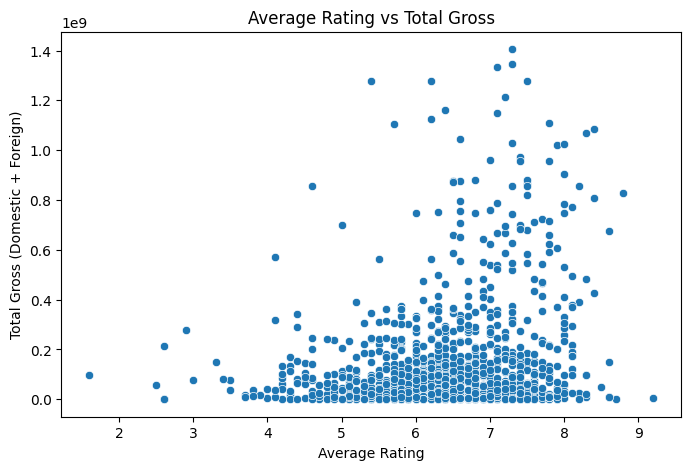

In [15]:
# Creating a scatter plot to check if higher-rated movies tend to earn more
  # Converting gross columns to numeric and then calculating total gross
final_df['domestic_gross'] = pd.to_numeric(final_df['domestic_gross'], errors='coerce')
final_df['foreign_gross'] = pd.to_numeric(final_df['foreign_gross'], errors='coerce')
final_df['total_gross'] = final_df['domestic_gross'] + final_df['foreign_gross']

plt.figure(figsize=(8, 5))
sns.scatterplot(data=final_df, x='averagerating', y='total_gross')
plt.title('Average Rating vs Total Gross')
plt.xlabel('Average Rating')
plt.ylabel('Total Gross (Domestic + Foreign)')
plt.show()

## 3. Which genres tend to perform best financially?

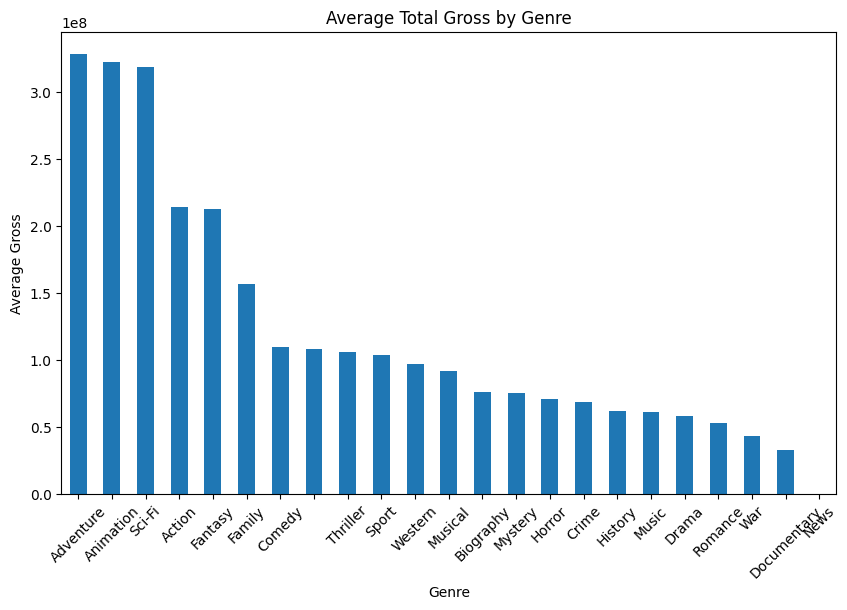

In [16]:
# Splitting genre strings into lists and exploding them for analysis
final_df['genres'] = final_df['genres'].fillna('')
final_df['genres_list'] = final_df['genres'].str.split(',')
exploded_df = final_df.explode('genres_list')

# Calculating average total gross per genre and plotting
genre_gross = exploded_df.groupby('genres_list')[['domestic_gross', 'foreign_gross']].mean().sum(axis=1).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
genre_gross.plot(kind='bar')
plt.title('Average Total Gross by Genre')
plt.ylabel('Average Gross')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()


## 4. How do the genres perform domestically vs. abroad?

In [17]:
## Cleaning genre data to remove unnamed entries
# Stripping whitespace & replacing empty strings with NaN
final_df['genres'] = final_df['genres'].str.strip().replace('', np.nan)

# Drop rows with missing genres
final_df = final_df.dropna(subset=['genres'])

# Explode the genre list
exploded_df = final_df.explode('genres_list')


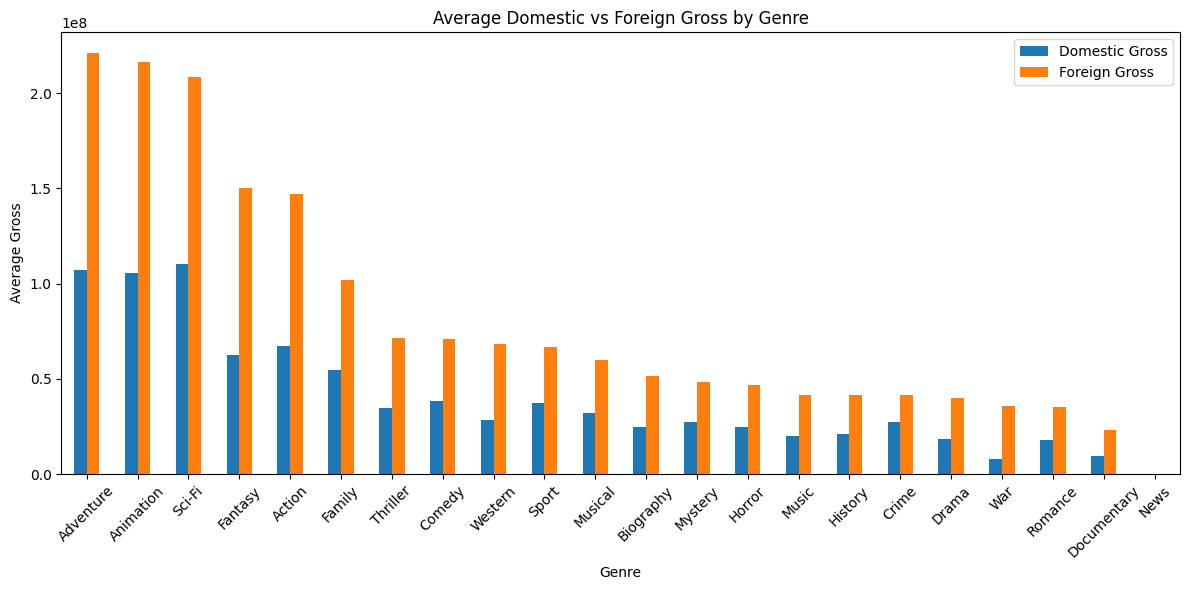

In [18]:
# Grouping by genre and calculating average domestic and foreign gross
genre_earnings = exploded_df.groupby('genres_list')[['domestic_gross', 'foreign_gross']].mean().sort_values(by='foreign_gross', ascending=False)

# Plotting a side-by-side bar chart to compare this
genre_earnings.plot(kind='bar', figsize=(12, 6))
plt.title('Average Domestic vs Foreign Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Gross')
plt.xticks(rotation=45)
plt.legend(['Domestic Gross', 'Foreign Gross'])
plt.tight_layout()
plt.show()


## 4. Does runtime affect box office success?

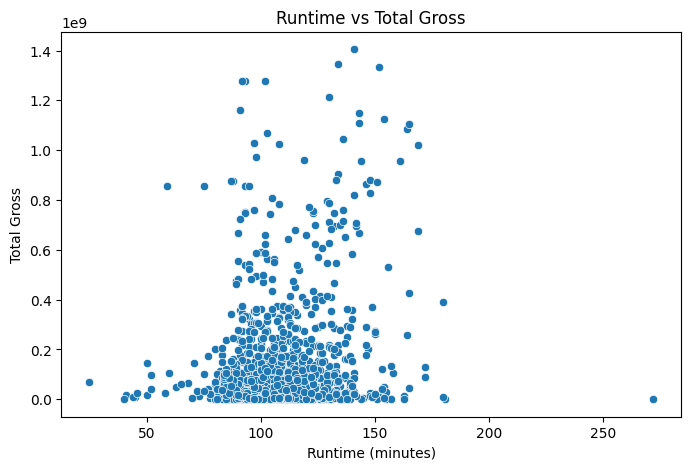

In [19]:
# Plotting runtime against total gross to see if movie length influences earnings

plt.figure(figsize=(8, 5))
sns.scatterplot(data=final_df, x='runtime_minutes', y=final_df['domestic_gross'] + final_df['foreign_gross'])
plt.title('Runtime vs Total Gross')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Total Gross')
plt.show()


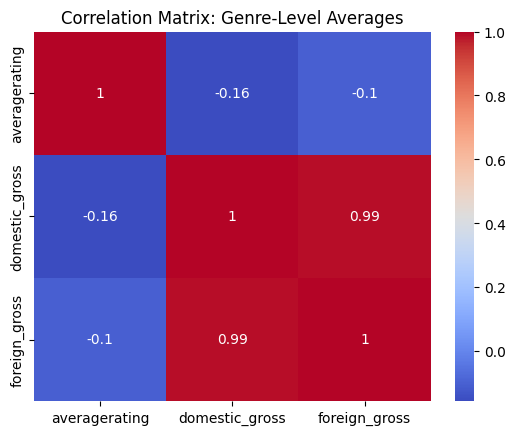

In [20]:
# Analyzing how average rating, domestic gross, and foreign gross relate across genres
# This helps identify which genre traits are linked to better performance

# Correlation between average rating, domestic gross, and foreign gross across genres
# Grouping by genre and calculating averages
genre_stats = exploded_df.groupby('genres_list')[['averagerating', 'domestic_gross', 'foreign_gross']].mean()

# Creating a correlation matrix
correlation_matrix = genre_stats.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Genre-Level Averages')
plt.show()


# Step 5: Feature Engineering

## 1. Creating a total gross column

In [ ]:
# Creating a new column that combines domestic and foreign gross
final_df['total_gross'] = final_df['domestic_gross'] + final_df['foreign_gross']
print(final_df['total_gross'])

## 2. Counting number of genres per movie

In [ ]:
# Adding a feature to count how many genres each movie has
final_df['genre_count'] = final_df['genres_list'].apply(lambda x: len(x) if isinstance(x, list) else 0)

# Step 6: Summary Statistics & Correlations

In [ ]:
# Creating a heatmap to visualize correlations between key numeric features
corr = final_df[['averagerating', 'runtime_minutes', 'total_gross', 'numvotes']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Numeric Features')
plt.xticks(rotation=13)
plt.show()


# Step 7: Final Thoughts & Recommendations

### Final Insights

- **Genre Performance**: Action, Adventure, and Fantasy genres show the highest average total gross. This suggests that audiences are more drawn to visually engaging and story-driven films, which could be a profitable focus for future productions.

- **Ratings vs Revenue**: There is a mild positive correlation between average ratings and total gross. While highly rated movies tend to earn more, some lower-rated films still perform well financially, indicating that other factors like marketing or franchise popularity may play a role.

- **Domestic vs Foreign Performance by Genre**: Genres such as Action and Adventure tend to earn significantly more in foreign markets than domestically, suggesting strong global appeal. In contrast, genres like Comedy and Drama show more balanced or locally skewed earnings, which could guide Microsoft in tailoring content for either international or domestic audiences depending on genre.


- **Runtime**: Movies with runtimes between 90 and 120 minutes appear to perform better on average. Extremely short or long films may struggle to attract broad audiences, so aiming for a balanced runtime could be beneficial.

- **Feature Engineering**: Creating a `total_gross` column helped combine domestic and foreign earnings into one metric, making comparisons easier. Adding a `genre_count` feature also revealed that movies spanning multiple genres don’t necessarily earn more, but may appeal to wider audiences.

These insights can help Microsoft make informed decisions about which types of movies to produce, focusing on genre trends, optimal runtimes, and the balance between quality and commercial appeal.
